In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds

In [31]:
(train, test), info = tfds.load(
    name='yelp_polarity_reviews',
    split=['train[:100000]', 'test[:8000]'],
    as_supervised=True,
    with_info=True
)

In [ ]:
info

In [32]:
train_text = np.array([x.numpy().decode('utf8') for x, y in train])
test_text = np.array([x.numpy().decode('utf8') for x, y in test])

In [33]:
train_labels = np.array([int(y) for x, y in train])
test_labels = np.array([int(y) for x, y in test])

In [34]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(train_text)

In [35]:
train_sequences = tokenizer.texts_to_sequences(train_text)
test_sequences = tokenizer.texts_to_sequences(test_text)

In [45]:
train_padded = tf.keras.utils.pad_sequences(train_sequences, maxlen=200)
test_padded = tf.keras.utils.pad_sequences(test_sequences, maxlen=200)

In [46]:
train_padded.shape

(100000, 200)

In [47]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(10000, 32),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [48]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, None, 32)          320000    
                                                                 
 lstm_7 (LSTM)               (None, 32)                8320      
                                                                 
 dense_8 (Dense)             (None, 32)                1056      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_9 (Dense)             (None, 1)                 33        
                                                                 
Total params: 329,409
Trainable params: 329,409
Non-trainable params: 0
_________________________________________________________________


In [49]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [50]:
history = model.fit(train_padded, train_labels, epochs=10, validation_data=(test_padded, test_labels))

Epoch 1/10
3125/3125 [==============================] - 95s 30ms/step - loss: 0.3612 - accuracy: 0.8438 - val_loss: 0.2105 - val_accuracy: 0.9206
Epoch 2/10
3125/3125 [==============================] - 35s 11ms/step - loss: 0.2033 - accuracy: 0.9281 - val_loss: 0.1962 - val_accuracy: 0.9236
Epoch 3/10
3125/3125 [==============================] - 34s 11ms/step - loss: 0.1804 - accuracy: 0.9381 - val_loss: 0.1980 - val_accuracy: 0.9246
Epoch 4/10
3125/3125 [==============================] - 31s 10ms/step - loss: 0.1681 - accuracy: 0.9423 - val_loss: 0.1910 - val_accuracy: 0.9273
Epoch 5/10
3125/3125 [==============================] - 31s 10ms/step - loss: 0.1602 - accuracy: 0.9461 - val_loss: 0.1963 - val_accuracy: 0.9254
Epoch 6/10
3125/3125 [==============================] - 29s 9ms/step - loss: 0.1521 - accuracy: 0.9485 - val_loss: 0.1986 - val_accuracy: 0.9256
Epoch 7/10
3125/3125 [==============================] - 30s 10ms/step - loss: 0.1468 - accuracy: 0.9511 - val_loss: 0.2048 - 

In [51]:
def graph(train_data, test_data, label):
    plt.plot(train_data, label=f'train {label}')
    plt.plot(test_data, label=f'test {label}')
    plt.title(f'Training & Validation {label}')
    plt.xlabel('epoch')
    plt.ylabel('value')
    plt.grid()
    plt.legend()
    plt.show()

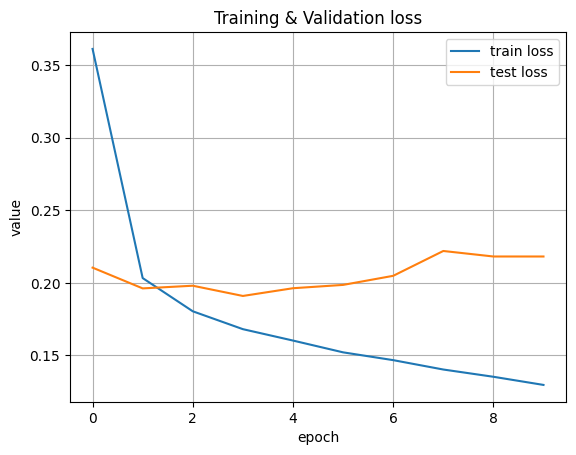

In [52]:
graph(history.history['loss'], history.history['val_loss'], 'loss')

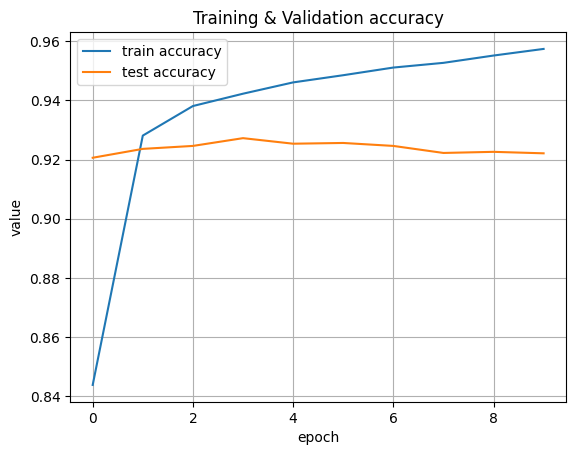

In [53]:
graph(history.history['accuracy'], history.history['val_accuracy'], 'accuracy')